In [ ]:
pip install play-scraper

     |████████████████████████████████| 61kB 4.7MB/s 
     |████████████████████████████████| 3.2MB 16.2MB/s 
  Created wheel for requests-futures: filename=requests_futures-1.0.0-cp37-none-any.whl size=7028 sha256=20f2d5b1ca9aac4a39d90b1e96d183822a2d87554644aa860016ea2bd3f39aae
  Stored in directory: /root/.cache/pip/wheels/26/d0/f5/dc4e4a37bbe55c9acf967d2bd899152412c1e49c227f5395ff
Successfully built requests-futures


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
import gensim
import numpy as np
from nltk.tokenize import word_tokenize, sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
G = nx.Graph()
edge = []

In [ ]:
import play_scraper
from itertools import combinations
trending_apps = []
app1 = []
trending_apps.append('com.mojang.minecraftpe')
# print(play_scraper.similar('com.supercell.clashofclans'))
for i in trending_apps:
 res_similar = play_scraper.search('minecraft', page=2)
#  print(res_similar)
 for w in res_similar:
   app1.append(w['app_id'])
   comb = (i,w['app_id'])
  #  print(comb)
   edge.append(tuple(comb))


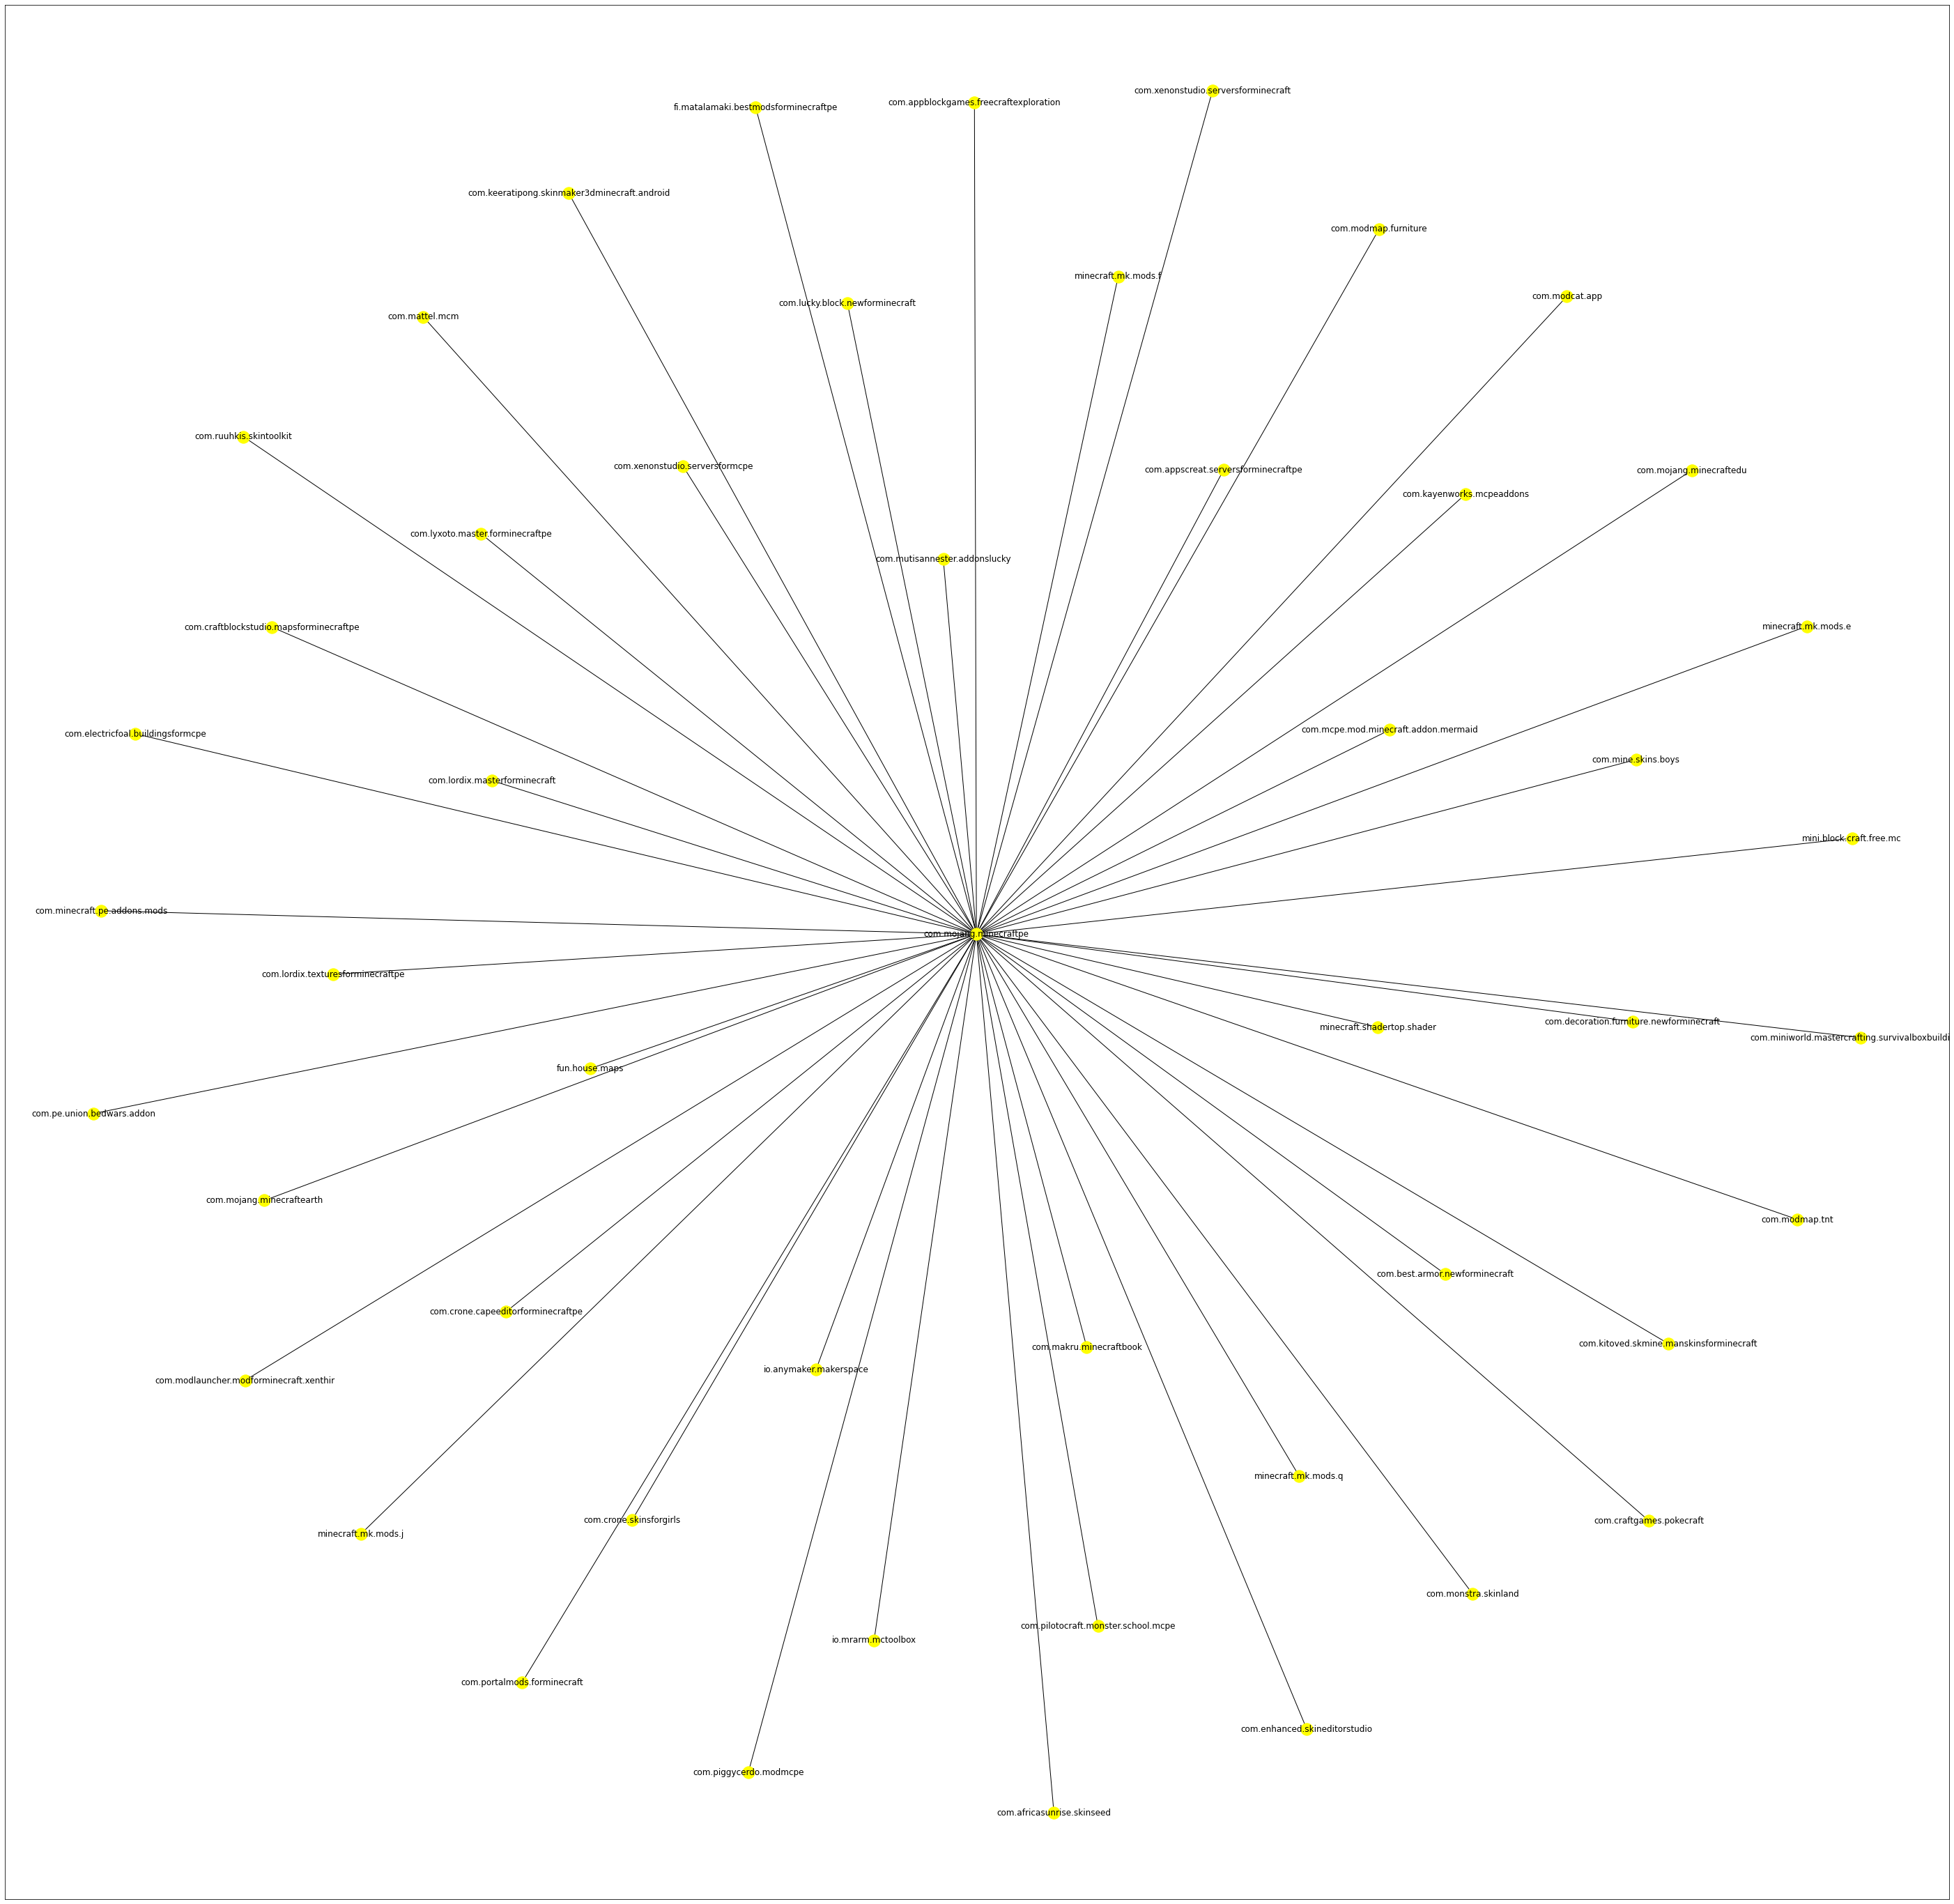

In [ ]:
G.add_edges_from(edge)
plt.figure(figsize = (50,50))
nx.draw_networkx(G, with_labels = True, node_color ='yellow')

In [ ]:
from datetime import datetime

def create_date_format(date_str):
  mon = {"Jan":1, "Feb":2, "Mar":3, "Apr":4, "May":5, "Jun":6, "Jul":7, "Aug":8, "Sep":9, "Oct":10, "Nov":11, "Dec":12}
  date_str = date_str.replace(',','')
  res = date_str.split(' ')
  # print(res)
  x = datetime(int(res[2]),mon[res[0]],int(res[1]))
  r = x.strftime("%b %d %Y")
  # print(r)

  return r
create_date_format("Jun 8, 2017")

'Jun 08 2017'

In [ ]:
pip install google-play-scraper

     |████████████████████████████████| 61kB 4.8MB/s 
  Created wheel for google-play-scraper: filename=google_play_scraper-1.0.0-cp37-none-any.whl size=24086 sha256=bfa1e0bb8654349e1114e6590d92999b94d160214bb74012c8736f28ea548e60
  Stored in directory: /root/.cache/pip/wheels/e9/98/5a/917dd15a6f100d35a26c5f6f0ae99895ae861aff74fafa1b08
Successfully built google-play-scraper


In [ ]:
def get_similarity(a,b):
  exp = play_scraper.details(a)
  exp1 = play_scraper.details(b)
  des_coc = exp['description']
  des_ebp = exp1['description']
  # print(exp['description'])
  file_docs = []
  tokens = sent_tokenize(des_coc)
  for line in tokens:
    file_docs.append(line)
  # print("Number of documents:",len(file_docs))
  gen_docs = [[w.lower() for w in word_tokenize(text)] for text in file_docs]  
  dictionary = gensim.corpora.Dictionary(gen_docs)
  corpus = [dictionary.doc2bow(gen_doc) for gen_doc in gen_docs]
  tf_idf = gensim.models.TfidfModel(corpus)
  for doc in tf_idf[corpus]:
    # print([[dictionary[id], np.around(freq, decimals=2)] for id, freq in doc]
    sims = gensim.similarities.Similarity('workdir/',tf_idf[corpus],num_features=len(dictionary))

  tokens = sent_tokenize(des_ebp)
  file2_docs = [] 
  for line in tokens:
        file2_docs.append(line)

  avg_sims = []
  for line in file2_docs:
        # tokenize words
        query_doc = [w.lower() for w in word_tokenize(line)]
        # create bag of words
        query_doc_bow = dictionary.doc2bow(query_doc)
        # find similarity for each document
        query_doc_tf_idf = tf_idf[query_doc_bow]
        # print (document_number, document_similarity)
        #print('Comparing Result:', sims[query_doc_tf_idf]) 
        # calculate sum of similarities for each query doc
        sum_of_sims =(np.sum(sims[query_doc_tf_idf], dtype=np.float32))
        # calculate average of similarity for each query doc
        avg = sum_of_sims / len(file_docs)
        # print average of similarity for each query doc
        #print(f'avg: {sum_of_sims / len(file_docs)}')
        # add average values into array
        avg_sims.append(avg)  
  # calculate total average
  total_avg = np.sum(avg_sims, dtype=np.float)
  # round the value and multiply by 100 to format it as percentage
  percentage_of_similarity = round(float(total_avg) * 100)
  # if percentage is greater than 100
  # that means documents are almost same
  # print("percentage of similarity = ",percentage_of_similarity)
  # if percentage_of_similarity >= 100:
  #   percentage_of_similarity = 100
  return percentage_of_similarity

In [17]:
from google_play_scraper import app
combs = []
edges = []
for i in trending_apps:
  print("APP - CURRENT - ",i)
  res_similar = play_scraper.search('callofduty',page=3)
  app1 = []
  app1.append(i)
  date1 = []
  all = []

  for w in res_similar:
   app1.append(w['app_id'])
   res = app(w['app_id'],lang='eng',country='us')
   #  print(res)
   r = res['released']
   D ={}
   d = create_date_format(r)
   D['app_id'] = w['app_id']
   D['release'] = d
   all.append(D)
   D ={}

  all.sort(key = lambda x: datetime.strptime(x['release'], '%b %d %Y'))
  comb = combinations(app1,2)
  edge.extend(comb)
  combs.extend(comb)
  print(all)
  for i in edge:
    a,b = i
    similarity = get_similarity(a,b)
    if(similarity > 200):
      G.add_edge(a,b)
      edges.extend(i)
      G[a][b]['weight'] = similarity 

  app1 = []
  comb = []
  edge = []
  print(all)
  all = []

APP - CURRENT -  com.mojang.minecraftpe
[{'app_id': 'com.gameloft.android.ANMP.GloftM4HM', 'release': 'Dec 10 2012'}, {'app_id': 'com.madfingergames.deadtrigger2', 'release': 'Oct 23 2013'}, {'app_id': 'com.mlg', 'release': 'Apr 10 2014'}, {'app_id': 'com.gameloft.android.ANMP.GloftM5HM', 'release': 'Jul 23 2014'}, {'app_id': 'com.gameloft.android.ANMP.GloftA3HM', 'release': 'Dec 17 2014'}, {'app_id': 'com.dodisoft.cob', 'release': 'Mar 24 2015'}, {'app_id': 'com.ea.game.starwarscapital_row', 'release': 'Nov 09 2015'}, {'app_id': 'com.feelingtouch.zf3d', 'release': 'Nov 23 2015'}, {'app_id': 'com.activision.boz', 'release': 'Dec 23 2015'}, {'app_id': 'com.erepubliklabs.worldatwar', 'release': 'Jul 29 2016'}, {'app_id': 'com.gamedevltd.modernstrike', 'release': 'Aug 11 2016'}, {'app_id': 'com.blayzegames.iosfps', 'release': 'Nov 07 2016'}, {'app_id': 'com.gameinsight.gobandroid', 'release': 'May 16 2017'}, {'app_id': 'com.rekoo.startrigger', 'release': 'Aug 24 2017'}, {'app_id': 'com.ga

/usr/local/lib/python3.7/dist-packages/gensim/similarities/docsim.py:518: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  result = numpy.hstack(shard_results)


KeyboardInterrupt: ignored